# On Validation of Hierarchical Clustering
Implementation of the approached followed on this paper with an additional analysis of the Adjusted Wallace index between cutoffs on a dendrogram

In [1]:
#import libraries
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics.cluster import adjusted_rand_score
from statistics import mean, stdev
from tabulate import tabulate
import pandas as pd
import numpy as np
import math


In [2]:
#function that returns partitions given the cluster assignments to our N elements to cluster
def cluster_indices(cluster_assignments,idx):
    n = cluster_assignments.max()
    clusters = []
    for cluster_number in range(1, n + 1):
        aux = np.where(cluster_assignments == cluster_number)[0].tolist()
        cluster = list(idx[i] for i in aux )
        clusters.append(cluster)
    return clusters

## 1. Clustering and contingency tables (from comparingpartitions.info)
Let X be a set of N data points {x1, x2, x3, ..., xN}. Given two clusterings of X, namely A={A1, A2, A3, ..., AR} with R clusters and B={B1, B2, B3, ..., BC} with C clusters, the information on cluster overlap between A and B can be summarized in the form of a R×C contingency table (CT) as illustrated below:

<img src="contingency_table.png">

where $n_{ij}$ denotes the number of elements that are common to clusters $A_i$ and $B_j$

Focusing on the pairwise agreement, the information in the CT can be further condensed in a mismatch matrix:

<img src="mismatch_matrix.png">

The entries of the mismatch matrix a,b,c,d can be calculated using the entires in the CT:

$$a = \frac{1}{2} \sum_{i=1}^R \sum_{j=1}^C n_{ij} (n_{ij} - 1)$$

$$b = \frac{1}{2} (\sum_{i=1}^R n_{i \bullet}^2 -\sum_{i=1}^R \sum_{j=1}^C n_{ij}^2 ) $$

$$c = \frac{1}{2} (\sum_{j=1}^C n_{\bullet j}^2 -\sum_{i=1}^R \sum_{j=1}^C n_{ij}^2 ) $$

$$d = \frac{1}{2} [N^2 + \sum_{i=1}^R \sum_{j=1}^C n_{ij}^2 - (\sum_{i=1}^R n_{i \bullet}^2 + \sum_{j=1}^C n_{\bullet j}^2) ] $$

### 1.1 Rand Index
$$rand\_index = \frac{a+d}{a+b+c+d} $$

### 1.2 Adjusted Rand Index
$$ ARI = \frac{ \sum_{i=1}^R \sum_{j=1}^C {{n_{ij}}\choose{2}} - [\sum_{i=1}^R {{n_{i \bullet}}\choose{2}} \sum_{j=1}^C {{ n_{\bullet j}}\choose{2}} ] / {{N}\choose{2}} }{\frac{1}{2} [\sum_{i=1}^R {{n_{i \bullet}}\choose{2}} + \sum_{j=1}^C {{ n_{\bullet j}}\choose{2}} ] - [\sum_{i=1}^R {{n_{i \bullet}}\choose{2}} \sum_{j=1}^C {{ n_{\bullet j}}\choose{2}} ] / {{N}\choose{2}} } $$



#### Numerator
$$ \sum_{i=1}^R \sum_{j=1}^C {{n_{ij}}\choose{2}} - \big[\sum_{i=1}^R {{n_{i \bullet}}\choose{2}} \sum_{j=1}^C {{ n_{\bullet j}}\choose{2}} \big] \big/ {{N}\choose{2}}  $$


$$ = \sum_{i=1}^R \sum_{j=1}^C \frac{n_{ij}!}{2(n_{ij}-2)!} - \big[\sum_{i=1}^R \frac{n_{i\bullet}!}{2(n_{i\bullet}-2)!} \sum_{j=1}^C \frac{n_{\bullet j}!}{2(n_{\bullet j}-2)!} \big] \big/ \frac{N!}{2(N-2)!}   $$

$$ = \frac{1}{2} \sum_{i=1}^R \sum_{j=1}^C n_{ij} (n_{ij} - 1) - \big[\sum_{i=1}^R \frac{1}{2}n_{i\bullet}(n_{i\bullet} -1) \sum_{j=1}^C \frac{1}{2}n_{\bullet j}(n_{\bullet j} -1) \big] \frac{2}{N(N-1)}  $$

$$ = a - \frac{1}{2N(N-1)} \big[ (\sum_{i=1}^R n_{i \bullet}^2 -\sum_{i=1}^R n_{i \bullet})(\sum_{j=1}^C n_{\bullet j}^2 - \sum_{j=1}^C n_{\bullet j}) \big] $$

$$ = a - n_c $$


#### Denominator
$$ \frac{1}{2} \big[\sum_{i=1}^R {{n_{i \bullet}}\choose{2}} + \sum_{j=1}^C {{ n_{\bullet j}}\choose{2}} \big] - \big[\sum_{i=1}^R {{n_{i \bullet}}\choose{2}} \sum_{j=1}^C {{ n_{\bullet j}}\choose{2}} \big] / {{N}\choose{2}} $$

$$ = \frac{1}{2} \big[ \frac{1}{2}(\sum_{i=1}^R n_{i \bullet}^2 -\sum_{i=1}^R n_{i \bullet}) + \frac{1}{2}(\sum_{j=1}^C n_{\bullet j}^2 - \sum_{j=1}^C n_{\bullet j}) \big] - n_c $$

$$ = \frac{1}{4} \big[ \sum_{i=1}^R n_{i \bullet}^2 -\sum_{i=1}^R n_{i \bullet} + \sum_{j=1}^C n_{\bullet j}^2 - \sum_{j=1}^C n_{\bullet j} \big] - n_c $$

hence the Adjusted Rand Index can be rewritten as:

$$ ARI = \frac{a-n_c}{n_d - n_c} $$

where

$$ n_c = \frac{1}{2N(N-1)} \big[ (\sum_{i=1}^R n_{i \bullet}^2 -\sum_{i=1}^R n_{i \bullet})(\sum_{j=1}^C n_{\bullet j}^2 - \sum_{j=1}^C n_{\bullet j}) \big] $$

$$ n_d = \frac{1}{4} \big[ \sum_{i=1}^R n_{i \bullet}^2 -\sum_{i=1}^R n_{i \bullet} + \sum_{j=1}^C n_{\bullet j}^2 - \sum_{j=1}^C n_{\bullet j} \big] $$

### 1.3 Fowlkes and Mallows Index
$$ FM = \frac{a}{\sqrt{(a+b)(a+c)}} $$

### 1.4 Jaccard Index
$$ Jaccard = \frac{a}{a+b+c} $$

### 1.5 Wallace's coefficient

$$ W_{A -> B} = \frac{a}{a+b} $$ 

$$  W_{B -> A} = \frac{a}{a+c} $$

### Adjusted Wallace

$$ AW_{A->B} = \frac{W_{A->B} - W_{i(A->B)}}{1 - W_{i(A->B)} } $$

where

$$  W_{i(A->B)} = 1 -SID_B $$

$$ SID_B = 1 - \frac{1}{N(N-1)} \sum_{j=1}^C n_{\bullet j} (n_{\bullet j} -1 ) $$

In [3]:
def cluster_external_index(partition_a, partition_b):
    #size of contigency table
    R = len(partition_a)
    C = len(partition_b)
    #contigency table
    ct = np.zeros((R+1,C+1))
    #fill the contigency table
    for i in range(0,R+1):
        for j in range(0,C):
            if(i in range(0,R)):  
                n_common_elements = len(set(partition_a[i]).intersection(partition_b[j]))
                ct[i][j] = n_common_elements
            else:
                ct[i][j] = ct[:,j].sum()
                      
        ct[i][j+1] = ct[i].sum()  
    
    N = ct[R][C]
    #condensed information of ct into a mismatch matrix (pairwise agreement)
    sum_all_squared = np.sum(ct[0:R][:,range(0,C)]**2)   
    sum_R_squared = np.sum(ct[0:R,C]**2)
    sum_R = np.sum(ct[0:R,C])
    sum_C_squared = np.sum(ct[R,0:C]**2)
    sum_C = np.sum(ct[R,0:C])
    #computing the number of pairs that are in the same cluster both in partition A and partition B
    a = 0
    for i in range(0,R):
        for j in range(0,C):
            a = a + ct[i][j]*(ct[i][j]-1)
    a = a/2
    #computing the number of pair in the same cluster in partition A but in different cluster in partition B
    b = (sum_R_squared- sum_all_squared)/2
    #computing the number of pair in different cluster in partition A but in the same cluster in partition B
    c = (sum_C_squared - sum_all_squared)/2
    #computing the number of pairs in different cluster both in partition A and partition B
    d = (N**2 + sum_all_squared - (sum_R_squared + sum_C_squared))/2
    
    #exception for single clusters 
    if(int(a) == 0 and int(b) == 0 and int(c) == 0):
        rand_index = 1
        adjusted_rand_index = 1
        FM = 0
        jaccard = 1
        adjusted_wallace = 1
    else:     
        rand_index = (a+d)/(a+b+c+d)
        
        #Adjusted Rand Index
        nc = ((sum_R_squared - sum_R)*(sum_C_squared -sum_C))/(2*N*(N-1))
        nd = (sum_R_squared - sum_R + sum_C_squared - sum_C)/4
        #exception for one big cluster
        if(nd == nc):
            adjusted_rand_index = 1
        else:  
            adjusted_rand_index = (a-nc)/(nd - nc)
        
        if((a+b)==0 or (a+c) == 0):
            FM = 0
        else:
            #Fowlks and Mallows
            FM = math.sqrt((a/(a+b))*(a/(a+c)))
        
        #Jaccard
        jaccard = a/(a+b+c)
        
        #Adjusted Wallace
        SID_B = 1-((sum_C_squared-sum_C)/(N*(N-1)))
        wallace = a/(a+b)
        #exception for one big cluster
        if(SID_B == 0):
            adjusted_wallace = 1
        else:
            adjusted_wallace = (wallace-(1-SID_B))/(1-(1-SID_B))
    
    return [rand_index, adjusted_rand_index, FM, jaccard, adjusted_wallace]

## 2. Cluster Validation - Measure of correspondence between a cluster $\alpha$ and a cluster $\beta$

### 2.1 Jaccard Coefficient
$$ \tau(\alpha, \beta) = \frac{|\alpha \cap \beta|}{|\alpha \cup \beta|} $$

### 2.2 The symmetric Dice coefficient
$$ \eta(\alpha, \beta) = \frac{|\alpha \cap \beta|}{|\alpha| + |\beta|} $$

### 2.3 The asymmetric coefficient
$$ \eta(\alpha, \beta) = \frac{|\alpha \cap \beta|}{|\alpha|} $$

In [4]:
#function to compute cluster validation indexes
def cluster_validation_indexes(cluster_a,cluster_b):
    #jaccard index
    num_jaccard = len(set(cluster_a).intersection(cluster_b))
    den_jaccard = len(set(cluster_a).union(cluster_b))
    jaccard = num_jaccard/den_jaccard
    
    #the symmetric Dice coefficient
    dice = num_jaccard/len(cluster_a)
    
    #the asymmetric measure gama
    gama = num_jaccard/(len(cluster_a)+len(cluster_b))
    
    return [jaccard, dice, gama]


## 3. Method
First the toy data "Wine" is loaded and a transformation into ranks is performed as a preprocessing step. Then hierarchical clustering using Ward's distance is used on the previous data matrix. Now an analysis of the optimal number of clusters in hierarchical clustering and a validation of the obtained clusters is done. Lastly an additional method is used to analyse the number of clusters that consists on computing the adjusted wallace index between cutoffs on the dendrogram.

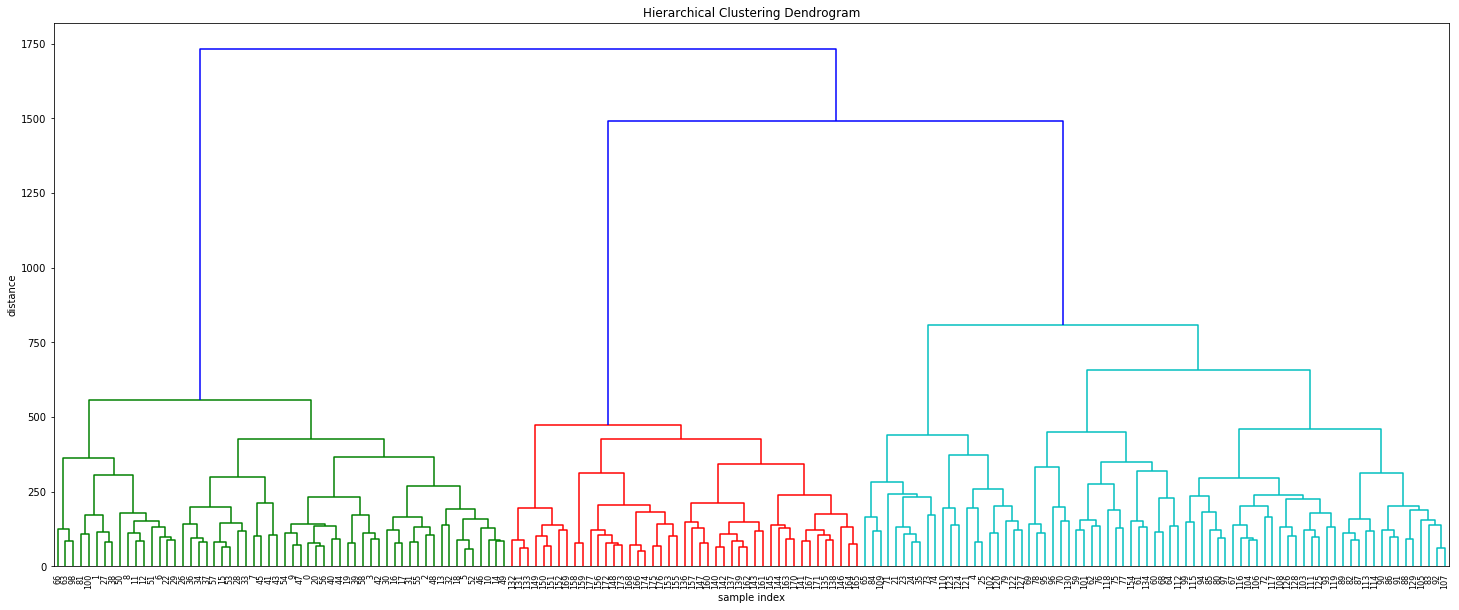

In [5]:
# load data
df = pd.read_table('wine.txt',sep = ',', header = None)

# Preprocessing step - transformation into ranks
df_ranks = df.loc[:,1:].rank(axis = 0,method = 'first')

# generate the linkage matrix
Z = linkage(df_ranks, 'ward')

# dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
        Z,
        #truncate_mode = 'lastp',
        #p=6,
        leaf_rotation=90.,  # rotates the x axis labels
        leaf_font_size=8.,  # font size for the x axis labels
        )
plt.show()

### 3.1 How many clusters?

  Number of clusters      Rand    Adjusted Rand    Fowlkes and Mallows    Jaccard
--------------------  --------  ---------------  ---------------------  ---------
                   2  0.733158         0.456886               0.763715   0.635464
                   3  0.86016          0.688973               0.795172   0.663075
                   4  0.85761          0.638732               0.736431   0.585655
                   5  0.878848         0.656726               0.7356     0.584679
                   6  0.879378         0.611079               0.686449   0.524782
                   7  0.881219         0.576228               0.648264   0.482197
                   8  0.893309         0.579083               0.642368   0.475485
                   9  0.898893         0.576468               0.636057   0.468414


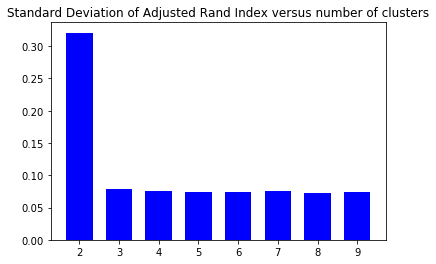

In [6]:
# bootstrap method - sampling without replacement
np.random.seed(123)

#dictionary to store all computed indexes for each number of clusters K=2,...9
dicio_statistics = {k:{} for k in range(2,10)}
for k in range(2,10):
    dicio_statistics[k]['rand'] = []
    dicio_statistics[k]['adjusted'] = []
    dicio_statistics[k]['FM'] = []
    dicio_statistics[k]['jaccard'] = []

# number of bootstrap samples
M = 250

#for each bootstrap sample
for i in range(M):
    # sampling rows of the original data
    idx = np.random.choice(len(df_ranks), int((3/4)*len(df_ranks)), replace = False)
    # Hierarchical Clustering of the bootstrap sample
    Z_bootstrap = linkage(df_ranks.loc[idx,:],'ward')

    #for each number of clusters k=2,...,9
    for k in range(2,10):
        c_assignments_original = fcluster(Z,k,criterion='maxclust')
        c_assignments_bootstrap = fcluster(Z_bootstrap,k,criterion='maxclust')
        #list of clusters for the clustering result with the original data
        partition_original = cluster_indices(c_assignments_original,df.index.tolist())
        #list of clusters for the clustering result with the bootstrap sample
        partition_bootstrap = cluster_indices(c_assignments_bootstrap,idx)

        #compute 4 different cluster external indexes between the partitions
        computed_indexes = cluster_external_index(partition_original,partition_bootstrap)
        dicio_statistics[k]['rand'].append(computed_indexes[0])
        dicio_statistics[k]['adjusted'].append(computed_indexes[1])
        dicio_statistics[k]['FM'].append(computed_indexes[2])
        dicio_statistics[k]['jaccard'].append(computed_indexes[3])

#obtain the average cluster external indexes for each number of clusters and show the results in a table
rand_avg = []
adjusted_avg = []
FM_avg = []
jaccard_avg = []
table = []
#obtain the standard deviation of adjusted rand index for each number of clusters
adjusted_std = []

for k in range(2,10):
    rand_avg.append(mean(dicio_statistics[k]['rand']))
    adjusted_avg.append(mean(dicio_statistics[k]['adjusted']))
    FM_avg.append(mean(dicio_statistics[k]['FM']))
    jaccard_avg.append(mean(dicio_statistics[k]['jaccard']))
    table.append([k,mean(dicio_statistics[k]['rand']),mean(dicio_statistics[k]['adjusted']),mean(dicio_statistics[k]['FM']),mean(dicio_statistics[k]['jaccard'])])
    adjusted_std.append(stdev(dicio_statistics[k]['adjusted']))
    
print(tabulate(table, headers=['Number of clusters', 'Rand','Adjusted Rand','Fowlkes and Mallows','Jaccard']))

#bar chart
width = 1/1.5
plt.figure(1)
plt.title('Standard Deviation of Adjusted Rand Index versus number of clusters')
plt.bar(range(2,10), adjusted_std, width, color="blue")
plt.show()
     

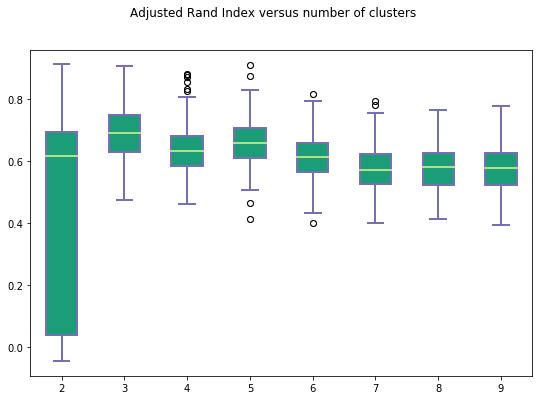

In [11]:
########################
#BOX PLOT
########################
data_to_plot = []
for k in range(2,10):
    data_to_plot.append(dicio_statistics[k]['adjusted'])

# Create a figure instance
#plt.figure(2)
fig = plt.figure(2, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data_to_plot)

#Make it pretty
## add patch_artist=True option to ax.boxplot() 
## to get fill color
bp = ax.boxplot(data_to_plot, patch_artist=True)

## change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#1b9e77' )

## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)

## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=2)

## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)

fig.suptitle('Adjusted Rand Index versus number of clusters')
## Custom x-axis labels
ax.set_xticklabels(['2','3','4','5','6','7','8','9'])
## Remove top axes and right axes ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

fig

### 3.2 Cluster Validation
After the analysis performed above we arrived at the conclusion that there are 3 clusters in the data. Now we are going to analyze the stability of those clusters

In [8]:
#dictionary to store all computed indexes for each cluster
dicio_cluster_validation = {k:{} for k in range(1,4)}
for k in range(1,4):
    dicio_cluster_validation[k]['jaccard'] = []
    dicio_cluster_validation[k]['dice'] = []
    dicio_cluster_validation[k]['asymmetric'] = []

c_assignments_original = fcluster(Z,3,criterion='maxclust')
partition_original = cluster_indices(c_assignments_original,df.index.tolist())

#assess cluster stability for K=3 that was the number of clusters chosen
for i in range(M):
    # sampling rows of the original data
    idx = np.random.choice(len(df_ranks), int((3/4)*len(df_ranks)), replace = False)
    # Hierarchical Clustering of the bootstrap sample
    Z_bootstrap = linkage(df_ranks.loc[idx,:],'ward')

    c_assignments_bootstrap = fcluster(Z_bootstrap,3,criterion='maxclust')
    partition_bootstrap = cluster_indices(c_assignments_bootstrap,idx)

    for k in range(0,3):
        aux_jaccard = []
        aux_dice = []
        aux_asymmetric = []
        for i in range(0,3):
            aux = cluster_validation_indexes(partition_original[k],partition_bootstrap[i])
            aux_jaccard.append(aux[0])
            aux_dice.append(aux[1])
            aux_asymmetric.append(aux[2])

        dicio_cluster_validation[k+1]['jaccard'].append(max(aux_jaccard))
        dicio_cluster_validation[k+1]['dice'].append(max(aux_dice))
        dicio_cluster_validation[k+1]['asymmetric'].append(max(aux_asymmetric))

#obtain the average and standard deviation of the cluster external indexes for each number of clusters
jaccard_cluster_avg = []
dice_avg = []
asymmetric_avg = []
jaccard_cluster_std = []
dice_std = []
asymmetric_std = []

for k in range(1,4):
    jaccard_cluster_avg.append(mean(dicio_cluster_validation[k]['jaccard']))
    dice_avg.append(mean(dicio_cluster_validation[k]['dice']))
    asymmetric_avg.append(mean(dicio_cluster_validation[k]['asymmetric']))
    jaccard_cluster_std.append(stdev(dicio_cluster_validation[k]['jaccard']))
    dice_std.append(stdev(dicio_cluster_validation[k]['dice']))
    asymmetric_std.append(stdev(dicio_cluster_validation[k]['asymmetric']))

table = [[str(1) + '(' + str(len(partition_original[0])) + ')', jaccard_cluster_avg[0], dice_avg[0], asymmetric_avg[0],
          jaccard_cluster_std[0], dice_std[0], asymmetric_std[0]],
        [str(2) + '(' + str(len(partition_original[1])) + ')', jaccard_cluster_avg[1], dice_avg[1], asymmetric_avg[1],
          jaccard_cluster_std[1], dice_std[1], asymmetric_std[1]], 
        [str(3) + '(' + str(len(partition_original[2])) + ')', jaccard_cluster_avg[2], dice_avg[2], asymmetric_avg[2],
          jaccard_cluster_std[2], dice_std[2], asymmetric_std[2]]]

headers = ['Cluster Number', 'J_avg','D_avg','A_avg','J_std','D_std','A_std']
print(tabulate(table,headers))

Cluster Number       J_avg     D_avg     A_avg      J_std      D_std      A_std
----------------  --------  --------  --------  ---------  ---------  ---------
1(58)             0.602704  0.662966  0.375256  0.0574578  0.0632774  0.0223887
2(45)             0.70138   0.7448    0.411166  0.072685   0.0604483  0.0253159
3(75)             0.590302  0.629173  0.370164  0.064391   0.067788   0.0254523


### 3.3 Adjusted Wallace between cutoffs in the same dendrogram

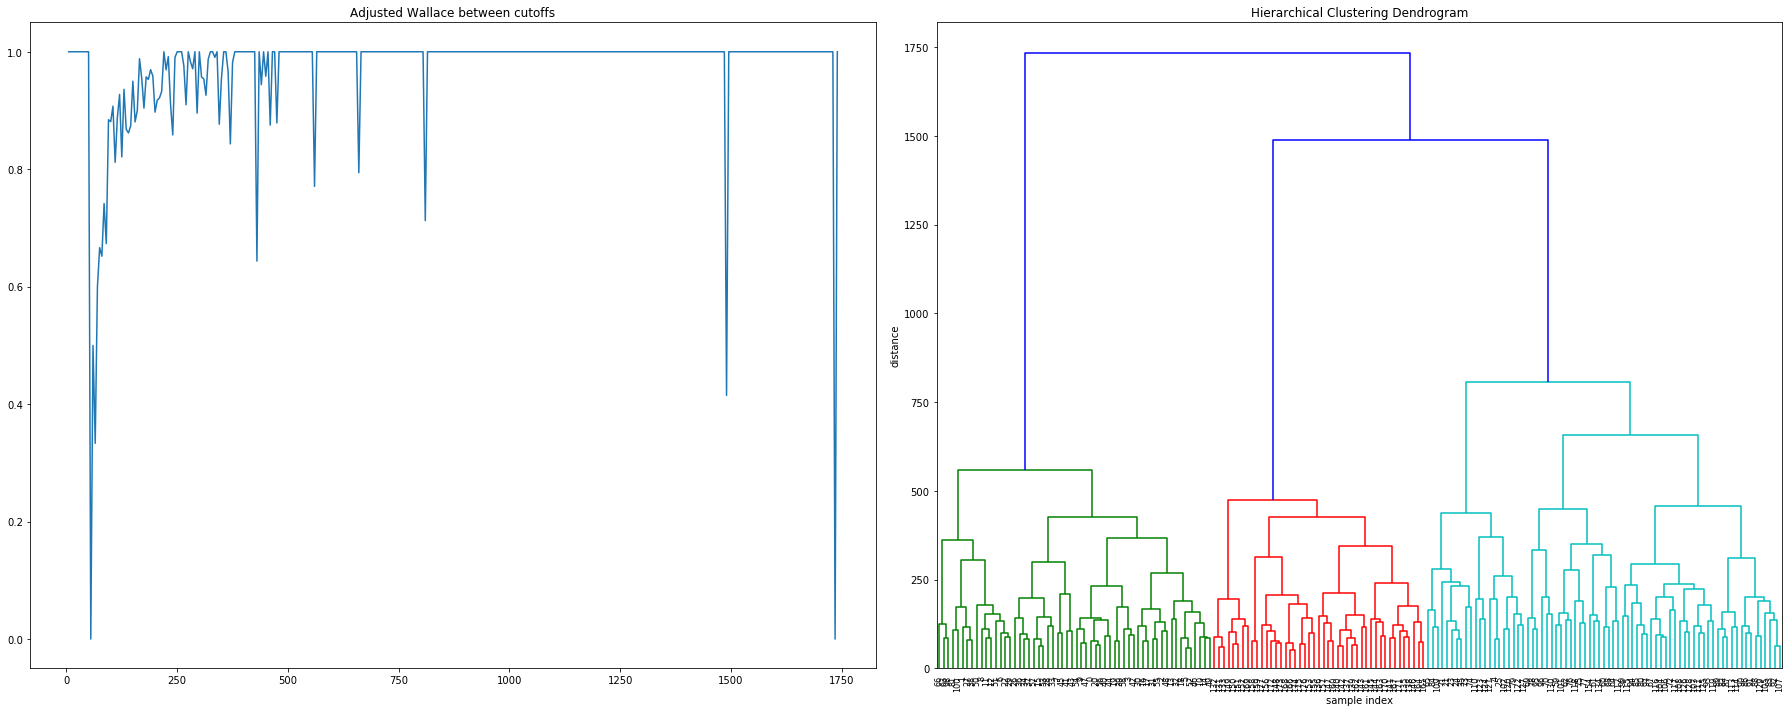

In [13]:
max_cutoff = round(Z[-1][2])
cutoff_axis = []
adjusted_wallace_axis = []
adjusted_rand_axis = []

#step between cutoff of 5
for cutoff in range(5,int(max_cutoff+10),5):
    c_assignments_original_a = fcluster(Z,cutoff,criterion='distance')
    partition_original_a = cluster_indices(c_assignments_original_a,df.index.tolist())
    c_assignments_original_b = fcluster(Z,cutoff-5,criterion='distance')
    partition_original_b = cluster_indices(c_assignments_original_b,df.index.tolist())

    computed_indexes = cluster_external_index(partition_original_a,partition_original_b)
    
    #python function to compute adjusted_rand
    #adjusted_rand_axis.append(adjusted_rand_score(c_assignments_original_a,c_assignments_original_b))
    
    cutoff_axis.append(cutoff)
    adjusted_wallace_axis.append(computed_indexes[4])

#plot the results
fig = plt.figure(3, figsize=(25, 10))
plt.subplot(1,2,1)
plt.title('Adjusted Wallace between cutoffs')
plt.plot(cutoff_axis, adjusted_wallace_axis)
#plt.plot(cutoff_axis,adjusted_rand_axis)

#plot the dendrogram at the side
plt.subplot(1,2,2)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
        Z,
        #truncate_mode = 'lastp',
        #p=6,
        leaf_rotation=90.,  # rotates the x axis labels
        leaf_font_size=8.,  # font size for the x axis labels
        )
plt.tight_layout()
fig